In [230]:
%load_ext autoreload
%autoreload 2
from paths import *

from matplotlib import pyplot as plt
import torch
from src.SERS_dataset import IterDataset
from src.generate_data2 import pseudoVoigtSimulatorTorch
from src.plotting.save_plot import save_plot
from src.plotting.AE_plotting import plot_loss
from src.data_simulator.SERSGenerator import SERSGenerator
# import make_axes_locatable
import numpy as np
import dill
import io

# matplotlib style seaborn-whitegrid
plt.style.use('seaborn-whitegrid')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cuda = torch.cuda.is_available()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\andre\AppData\Local\Temp\ipykernel_8364\407880992.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [231]:
gen = SERSGenerator((20,20), 500, 100, eta=[0,0])

X = gen.generate(2,2,0.1,1, plot=False, background='default')
print(gen.alpha.shape)
print(gen.Vp.shape)
c = gen.c
mapsize = gen.mapsize

(400, 2)
(2, 500)


In [232]:
# Print parameters of voigt model
print(f'c = {gen.c}')
print(f'gamma = {gen.gamma}')
print(f'eta = {gen.eta}')

c = [131.53806302 276.13223083]
gamma = [8.92280226 9.97035981]
eta = [0.43177339 0.78400663]


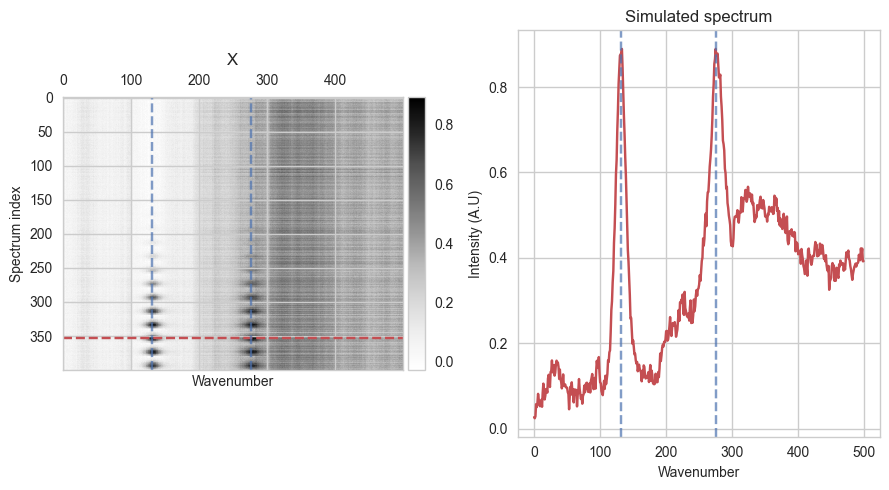

In [233]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# import make_axes_locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(1,2, figsize=(9,5))


ax = axs[0]

#  SERS Matrix
# matshow X, fill all the space
mappable = ax.matshow(X)   

ax.set_xlabel('Wavenumber')
ax.set_ylabel('Spectrum index')
ax.set_title('X')
#  colorbar on the right
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(mappable=mappable, cax=cax)



# Get row from X with most signal
row = np.argmax(np.sum(X, axis=1))
# plot vertical line on mappable at y=row
ax.axhline(row, color=colors[2], linestyle='--')

peaks = gen.c
# plot vertical lines at peak locations
for peak in peaks:
    ax.axvline(peak, color=colors[0], linestyle='--', alpha=0.7)


ax = axs[1]
# plot full spectrum for row with most signal
ax.plot(X[row,:], color=colors[2])
ax.set_title('Simulated spectrum')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity (A.U)')



# plot vertical lines at peak locations
for peak in peaks:
    ax.axvline(peak, color=colors[0], linestyle='--', alpha=0.7)



plt.tight_layout()

save_plot(plt, os.path.join(report_dir, "figures", "other_figures", "spectrum_introduction"), ["pdf", "png"])

In [236]:
gen = SERSGenerator((20,20), 500, 100, eta=[0,0])

X = gen.generate(2,2,0.1,1, plot=False, background='none')
print(gen.alpha.shape)
print(gen.Vp.shape)
c = gen.c
mapsize = gen.mapsize

(400, 2)
(2, 500)


In [238]:
gen.c = np.array([45,80])

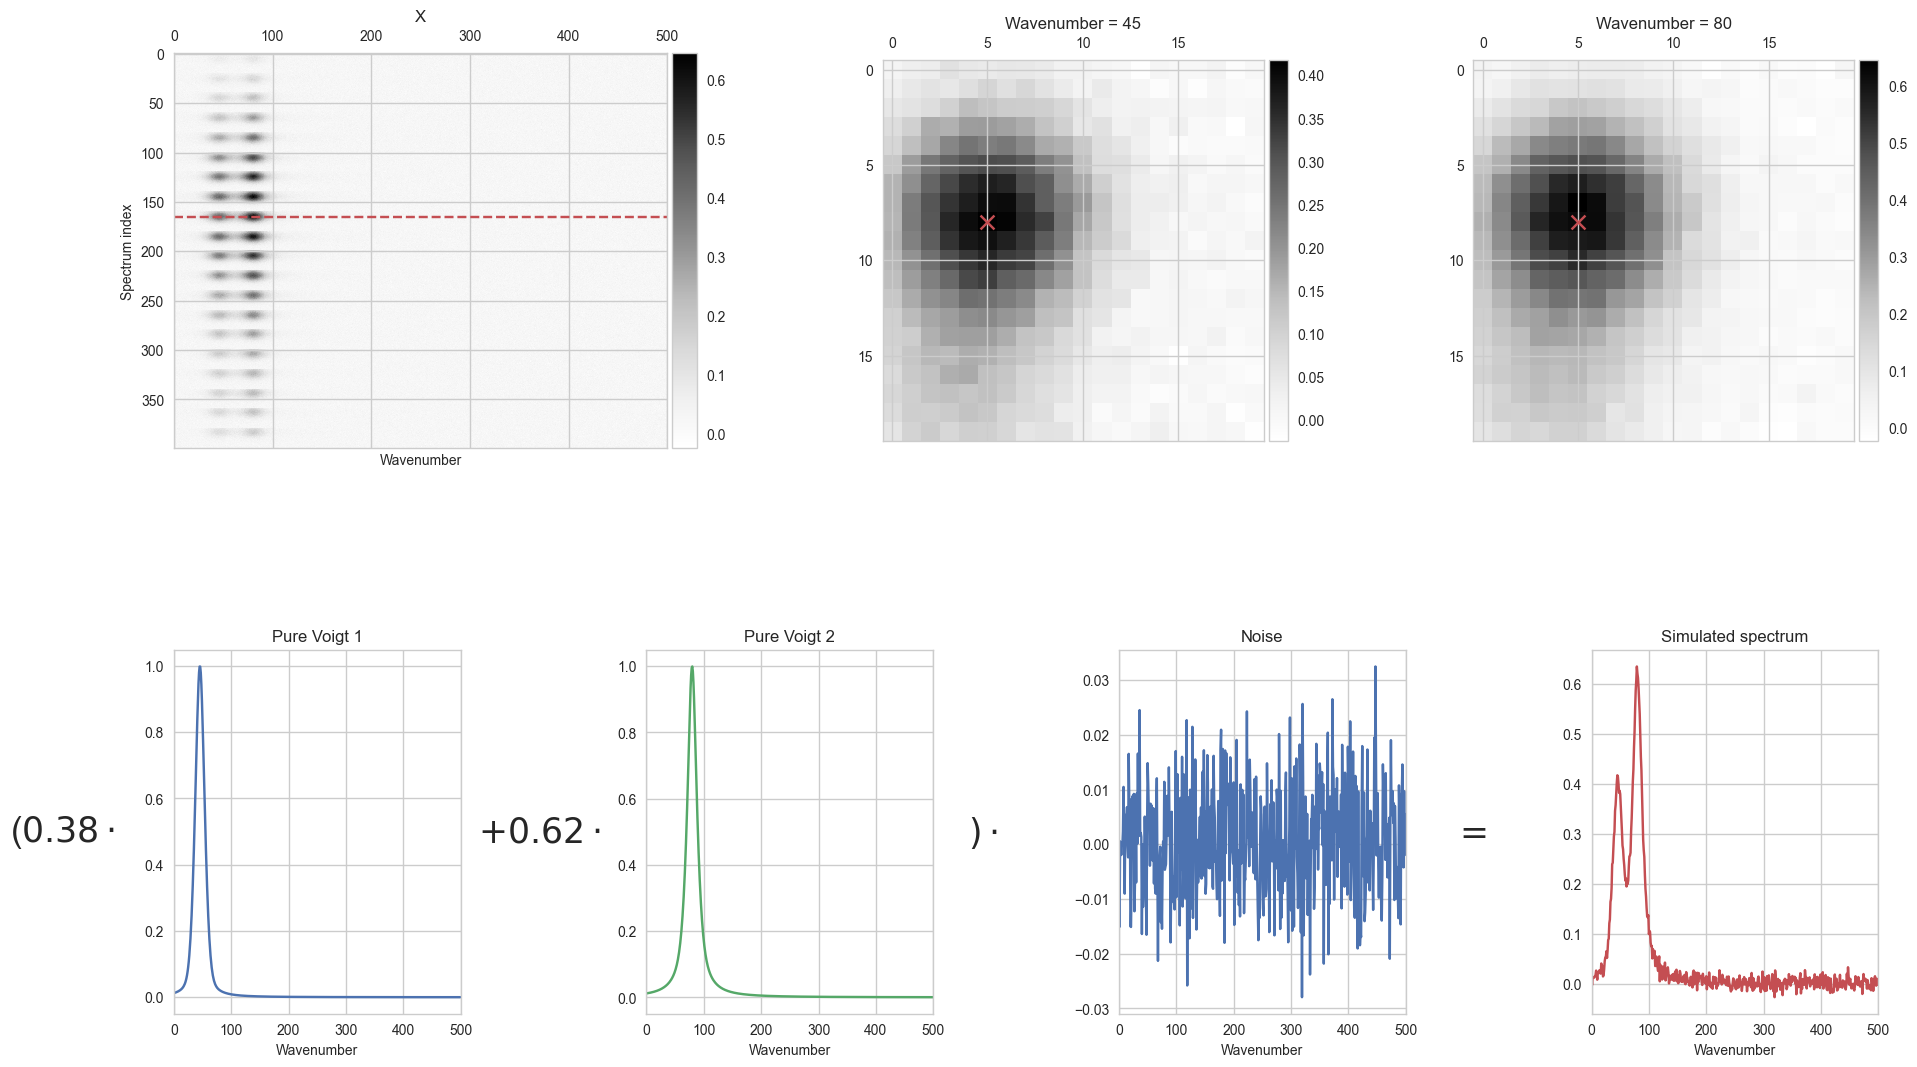

In [239]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 17, width_ratios=[1]*17, height_ratios=[2, 1])
fig = plt.figure(figsize=(20, 12))
axes = [gs[0, 2:7], gs[0, 8:12], gs[0, 13:17], gs[1, 2:5], gs[1, 6:9], gs[1, 10:13], gs[1, 14:17]]

# fig, axs = plt.subplots(2,4)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']



ax = plt.subplot(axes[0])

# SERS Matrix
ax.matshow(X)
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Spectrum index')
ax.set_title('X')
#  colorbar on the right
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(mappable=mappable, cax=cax)
ax.hlines(row, 0, X.shape[1], color=colors[2], linestyle='--')     
# x lim 
ax.set_xlim(0, X.shape[1])


# Get row from X with most signal
row = np.argmax(np.sum(X, axis=1))

# Loadings of peak 1
ax = plt.subplot(axes[1])
mappable = ax.matshow(X[:, round(gen.c[0])].reshape(*mapsize))
ax.set_title(f'Wavenumber = {round(gen.c[0])}')
#  colorbar on the right
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(mappable=mappable, cax=cax)
ax.scatter(row%mapsize[0], row//mapsize[0], marker='x', s=100, color=colors[2])

# Loadings of peak 2
ax = plt.subplot(axes[2])
mappable = ax.matshow(X[:, round(gen.c[1])].reshape(*mapsize))
ax.set_title(f'Wavenumber = {round(gen.c[1])}')
#  colorbar on the right
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(mappable=mappable, cax=cax)
ax.scatter(row%mapsize[0], row//mapsize[0], marker='x', s=100, color=colors[2])

# plot alpha 
ax = plt.subplot(axes[3])

# use first color in matplotlib palette
ax = plt.subplot(axes[3])
ax.plot(gen.Vp[0,:], color=colors[0])
ax.set_xlabel('Wavenumber')
ax.set_title('Pure Voigt 1')
ax.set_xlim(0, X.shape[1])

# use second color in matplotlib palette
ax = plt.subplot(axes[4])
ax.plot(gen.Vp[1,:], color=colors[1])
ax.set_xlabel('Wavenumber')
ax.set_title('Pure Voigt 2')
ax.set_xlim(0, X.shape[1])

real_noise = gen.real_noise[row]
ax = plt.subplot(axes[5])
ax.plot(real_noise, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
ax.set_title('Noise')
ax.set_xlabel('Wavenumber')
# set x lim
ax.set_xlim(0, X.shape[1])

ax = plt.subplot(axes[6])
ax.plot(X[row,:], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
ax.set_title('Simulated spectrum')
ax.set_xlabel('Wavenumber')
# set x lim 
ax.set_xlim(0, X.shape[1])

# add smalle spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

(alpha1, alpha2) = gen.alpha[row]

fs = 25
fig.text(0.07, 1/5, f'(${np.round(alpha1,2)} \\cdot$', ha='center', va='center', fontsize=fs)
fig.text(5/15-0.025, 1/5, f'$+ {np.round(alpha2,2)} \\cdot$', ha='center', va='center', fontsize=fs)
fig.text(9/15-0.07, 1/5, f'$) + $', ha='center', va='center', fontsize=fs)
fig.text(12/15-0.026, 1/5, '$=$', ha='center', va='center', fontsize=fs)

plt.tight_layout()

save_plot(plt, os.path.join(report_dir, "figures", "other_figures", "data_simulator_methods"), ["pdf", "png"])